In [1]:
import pandas as pd
df = pd.read_csv('weight-height.csv')

C:\Users\VAN LAM\AppData\Local\Temp\ipykernel_27392\1180397628.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df['Height'] = df['Height'] * 0.393701
df['Weight'] = df['Weight'] * 2.20462
print(df.head(5))

  Gender     Height      Weight
0   Male  29.073644  533.283387
1   Male  27.079504  357.832914
2   Male  29.177223  469.012745
3   Male  28.240558  485.110031
4   Male  27.512533  454.922897


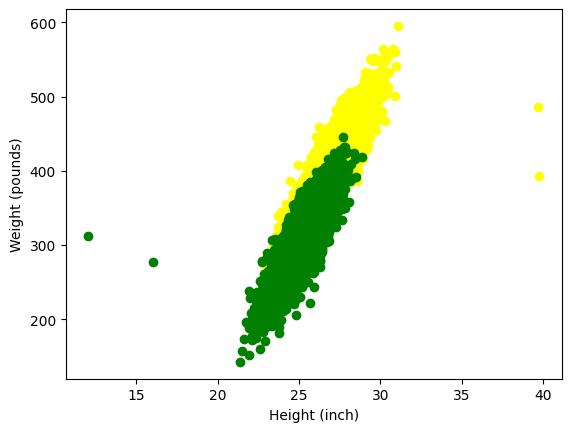

In [3]:
import matplotlib.pyplot as plt

x=df["Height"]
y=df["Weight"]
plt.scatter(x[df['Gender']=="Male"], y[df['Gender']=="Male"], color='yellow')
plt.scatter(x[df['Gender']=="Female"], y[df['Gender']=="Female"], color='green')
plt.xlabel("Height (inch)")
plt.ylabel("Weight (pounds)")
plt.show()

w0 = -745.3451113049775, w1 = [42.14688054]


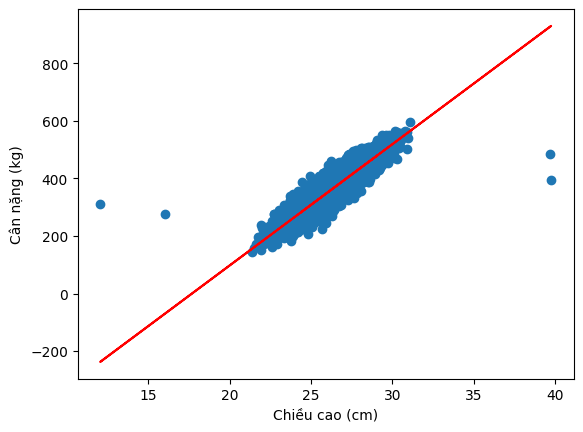

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x.values.reshape(-1,1), y)
w0 = reg.intercept_
w1 = reg.coef_
print(f'w0 = {w0}, w1 = {w1}')

plt.plot(x, w0 + w1 * x, color="red")
plt.scatter(x, y)
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Cân nặng (kg)")
plt.show()

In [5]:
import numpy as np

# Tìm toạ độ nhiễu sử dụng Z-score
threshold = 3
z_scores = np.abs((df['Weight'] - df['Weight'].mean()) / df['Weight'].std())
outliers = df[z_scores > threshold]

# In ra các toạ độ nhiễu
print("Các điểm nhiễu:")
print(outliers)

# Loại bỏ các toạ độ nhiễu khỏi DataFrame
df = df[z_scores <= threshold]

# In ra số lượng điểm sau khi loại bỏ nhiễu
print("Số lượng điểm sau khi loại bỏ nhiễu:", len(df))

Các điểm nhiễu:
      Gender     Height      Weight
2014    Male  31.101884  595.224689
9285  Female  21.363450  142.639193
Số lượng điểm sau khi loại bỏ nhiễu: 9998


In [6]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành 2 phần train_set (80%) và test_set (20%) chia đều cho cả 2 giới tính
train_male, test_male = train_test_split(df[df['Gender'] == 'Male'], test_size=0.2, random_state=42)
train_female, test_female = train_test_split(df[df['Gender'] == 'Female'], test_size=0.2, random_state=42)

# In ra số lượng dữ liệu cho nam và nữ ở 2 tập dữ liệu
print("Số lượng dữ liệu cho nam trong tập huấn luyện:", len(train_male))
print("Số lượng dữ liệu cho nam trong tập kiểm tra:", len(test_male))
print("Số lượng dữ liệu cho nữ trong tập huấn luyện:", len(train_female))
print("Số lượng dữ liệu cho nữ trong tập kiểm tra:", len(test_female))

Số lượng dữ liệu cho nam trong tập huấn luyện: 3999
Số lượng dữ liệu cho nam trong tập kiểm tra: 1000
Số lượng dữ liệu cho nữ trong tập huấn luyện: 3999
Số lượng dữ liệu cho nữ trong tập kiểm tra: 1000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Chia dữ liệu thành 2 phần train_set (80%) và test_set (20%) chia đều cho cả 2 giới tính
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập train_set
X_train = train_set[['Height']]
y_train = train_set['Weight']
model.fit(X_train, y_train)

# Dự đoán trên tập train_set
y_train_pred = model.predict(X_train)

# Tính R2 score trên tập train_set
r2_train = r2_score(y_train, y_train_pred)
print("R2 score trên tập train_set:", r2_train)

R2 score trên tập train_set: 0.8408826130656315


In [8]:
# Dự đoán trên tập test_set
X_test = test_set[['Height']]
y_test = test_set['Weight']
y_test_pred = model.predict(X_test)

# Tính R2 score trên tập test_set
r2_test = r2_score(y_test, y_test_pred)
print("R2 score trên tập test_set:", r2_test)

R2 score trên tập test_set: 0.8176058265533148


In [9]:
def predict_body_balance(height, weight, model):
    """
    Hàm dự đoán tình trạng cân đối của người dựa trên chiều cao và cân nặng.
    
    Tham số:
    - height (float): Chiều cao của người (đơn vị cm).
    - weight (float): Cân nặng của người (đơn vị kg).
    - model (LinearRegression): Mô hình hồi quy tuyến tính đã được huấn luyện.
    
    Trả về:
    - prediction (str): Tình trạng cân đối dự đoán ('Underweight', 'Normal', 'Overweight').
    """
    # Dự đoán cân nặng dựa trên chiều cao
    predicted_weight = model.predict([[height]])
    
    # Tính sai số giữa cân nặng dự đoán và cân nặng thực tế
    error = predicted_weight - weight
    
    # Dựa vào sai số để đưa ra dự đoán về tình trạng cân đối
    if error < -2:
        prediction = 'Underweight'  # Dưới cân
    elif error > 2:
        prediction = 'Overweight'   # Thừa cân
    else:
        prediction = 'Normal'       # Bình thường
    
    return prediction


# Dự đoán tình trạng cân đối cho một người có chiều cao là 170cm và cân nặng là 60kg
height = 176
weight = 54
predicted_body_balance = predict_body_balance(height, weight, model)
print("Tình trạng cân đối dự đoán:", predicted_body_balance)

Tình trạng cân đối dự đoán: Overweight


d:\Workspace\TriTueNhanTao\envs\ai_class\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
